# Análise do Desempenho de Alunos nos Exames<br>
Dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

# 1. Carregamento e Visualização Inicial dos Dados

**Carregando os dados e exibindo primeiras linhas**

In [1]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Veificando tipos de variáveis e valores ausentes**

In [3]:
# Verifica o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Verifica se existem valores NaN no DataFrame
df.isnull().any()

,0
gender,False
race/ethnicity,False
parental level of education,False
lunch,False
test preparation course,False
math score,False
reading score,False
writing score,False


# 2. Probabilidade e Distribuições

In [5]:
# Calculando a probabilidade empírica de um aluno tirar mais de 80 em matemática
df_mais80 = df[df['math score'] > 80]
probMais80 = df_mais80.shape[0]/df.shape[0]
print("A probabilidade de um aluno tirar mais de 80 em matemática é: ", probMais80, "ou", probMais80 * 100, "%")

A probabilidade de um aluno tirar mais de 80 em matemática é:  0.176 ou 17.599999999999998 %


In [6]:
# Calculando a probabilidade de um aluno que fez o curso preparatório tirar mais de 70 em todas as provas
df_preparatory = df[df['test preparation course'] == 'completed']
df_preparatory_mais70 = df_preparatory[(df_preparatory['math score'] > 70) & (df_preparatory['reading score'] > 70) & (df_preparatory['writing score'] > 70)]
probPreparatoryMais70 = df_preparatory_mais70.shape[0]/df_preparatory.shape[0]
print("A probabilidade de um aluno que fez o curso preparatório tirar mais de 70 em todas as provas é: ", probPreparatoryMais70, "ou", probPreparatoryMais70 * 100, "%")

A probabilidade de um aluno que fez o curso preparatório tirar mais de 70 em todas as provas é:  0.39106145251396646 ou 39.10614525139665 %


# 3. Estatística Descritiva

In [7]:
# Calculando a média das notas
df[['math score', 'reading score','writing score']].mean()

,0
math score,66.089
reading score,69.169
writing score,68.054


In [8]:
# Calculando a mediana das notas
df[['math score', 'reading score','writing score']].median()

,0
math score,66.0
reading score,70.0
writing score,69.0


In [9]:
# Calculando a moda das notas
df[['math score', 'reading score','writing score']].mode()

,math score,reading score,writing score
0,65,72,74


In [10]:
# Calculando o desvio padrão das notas
df[['math score', 'reading score','writing score']].std()

,0
math score,15.163080
reading score,14.600192
writing score,15.195657


In [11]:
# Calculando o mínimo das notas
df[['math score', 'reading score','writing score']].min()

,0
math score,0
reading score,17
writing score,10


In [12]:
# Calculando o máximo das notas
df[['math score', 'reading score','writing score']].max()

,0
math score,100
reading score,100
writing score,100


# 3. Análise Exploratória de Dados

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

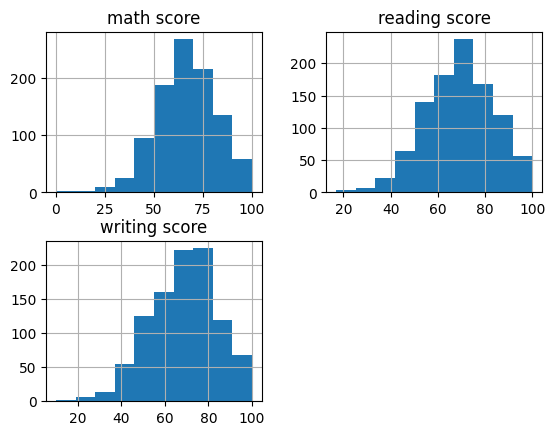

In [13]:
# Criando distribuições das notas (histogramas).
df[['math score', 'reading score','writing score']].hist(bins=10)

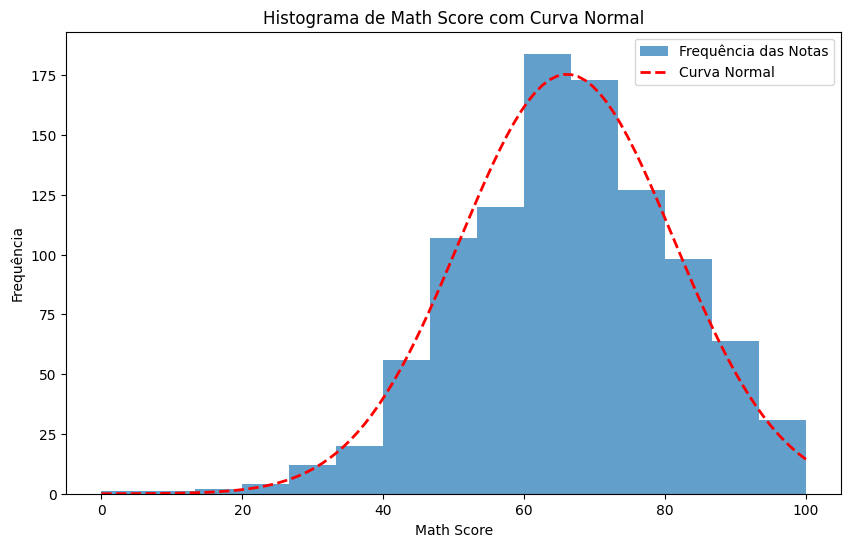

In [14]:
# Verificando graficamente se a distribuição das notas de Matemática se aproxima de uma distribuição normal

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mathScore = df['math score']

# Plotando o histograma
plt.figure(figsize=(10, 6))
contagem, bins, _ = plt.hist(mathScore, bins=15, density=False, alpha=0.7, label='Frequência das Notas')

# Calculando média e desvio padrão
media = mathScore.mean()
desvio_padrao = mathScore.std()

# O eixo X vai do valor mínimo ao máximo da amostra
eixo_x = np.linspace(mathScore.min(), mathScore.max(), 100)

# O eixo Y, que é a contagem total dos bins e largura do bin
largura_do_bin = bins[1] - bins[0]
eixo_y = norm.pdf(eixo_x, media, desvio_padrao) * len(mathScore) * largura_do_bin

# Plota a linha da curva normal sobre o histograma
plt.plot(eixo_x, eixo_y, 'r--', linewidth=2, label='Curva Normal')

plt.title('Histograma de Math Score com Curva Normal')
plt.xlabel('Math Score')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)

plt.show()


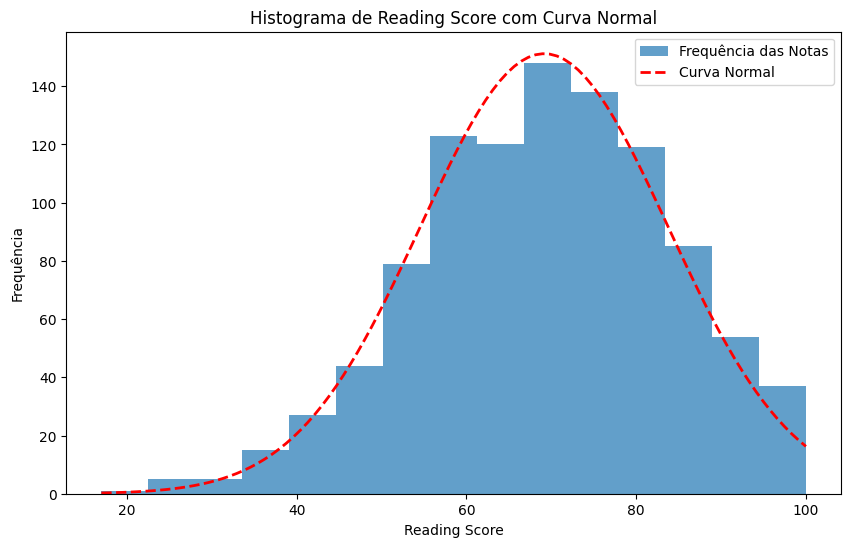

In [15]:
# Verificando graficamente se a distribuição das notas de Leitura se aproxima de uma distribuição normal

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

readingScore = df['reading score']

# Plotando o histograma
plt.figure(figsize=(10, 6))
contagem, bins, _ = plt.hist(readingScore, bins=15, density=False, alpha=0.7, label='Frequência das Notas')

# Calculando média e desvio padrão
media = readingScore.mean()
desvio_padrao = readingScore.std()

# O eixo X vai do valor mínimo ao máximo da amostra
eixo_x = np.linspace(readingScore.min(), readingScore.max(), 100)

# O eixo Y, que é a contagem total dos bins e largura do bin
largura_do_bin = bins[1] - bins[0]
eixo_y = norm.pdf(eixo_x, media, desvio_padrao) * len(readingScore) * largura_do_bin

# Plota a linha da curva normal sobre o histograma
plt.plot(eixo_x, eixo_y, 'r--', linewidth=2, label='Curva Normal')

plt.title('Histograma de Reading Score com Curva Normal')
plt.xlabel('Reading Score')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)

plt.show()


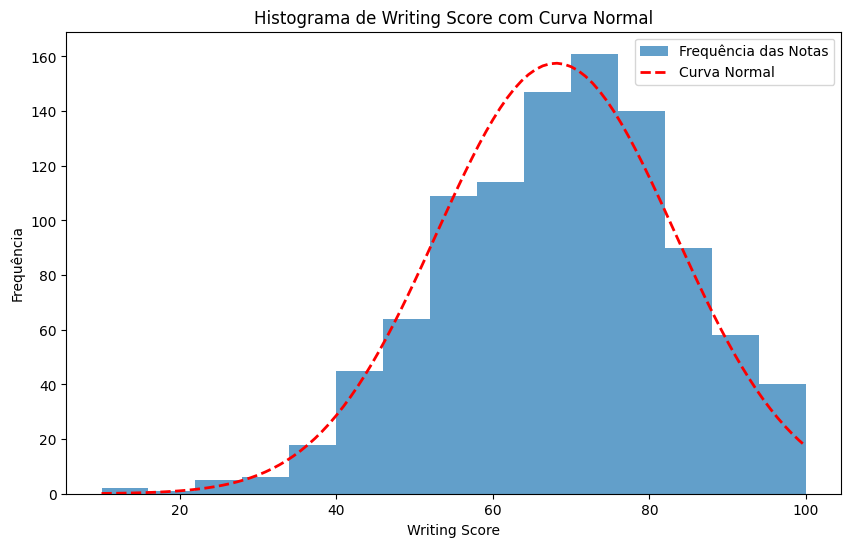

In [16]:
# Verificando graficamente se a distribuição das notas de Escrita se aproxima de uma distribuição normal

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

writingScore = df['writing score']

# Plotando o histograma
plt.figure(figsize=(10, 6))
contagem, bins, _ = plt.hist(writingScore, bins=15, density=False, alpha=0.7, label='Frequência das Notas')

# Calculando média e desvio padrão
media = writingScore.mean()
desvio_padrao = writingScore.std()

# O eixo X vai do valor mínimo ao máximo da amostra
eixo_x = np.linspace(writingScore.min(), writingScore.max(), 100)

# O eixo Y, que é a contagem total dos bins e largura do bin
largura_do_bin = bins[1] - bins[0]
eixo_y = norm.pdf(eixo_x, media, desvio_padrao) * len(writingScore) * largura_do_bin

# Plota a linha da curva normal sobre o histograma
plt.plot(eixo_x, eixo_y, 'r--', linewidth=2, label='Curva Normal')

plt.title('Histograma de Writing Score com Curva Normal')
plt.xlabel('Writing Score')
plt.ylabel('Frequência')
plt.legend()
plt.grid(False)

plt.show()


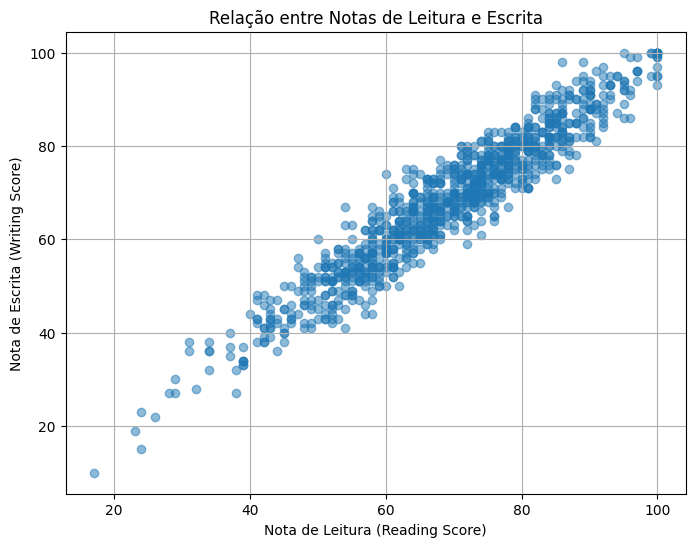

In [17]:
# Criando gráficos de dispersão entre leitura e escrita

eixo_x = df['reading score']
eixo_y = df['writing score']

plt.figure(figsize=(8, 6))
plt.scatter(eixo_x, eixo_y, alpha=0.5)

plt.title('Relação entre Notas de Leitura e Escrita')
plt.xlabel('Nota de Leitura (Reading Score)')
plt.ylabel('Nota de Escrita (Writing Score)')
plt.grid(True)

plt.show()

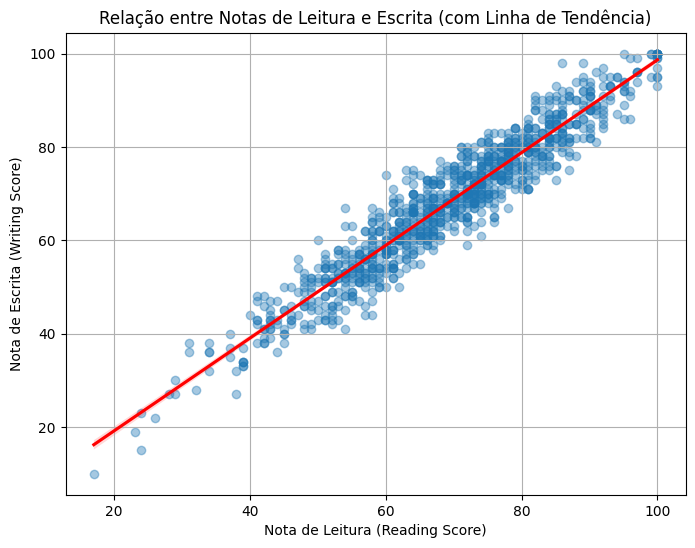

In [18]:
# Criando gráficos de dispersão entre leitura e escrita com linha de Tendência

import seaborn as sns

plt.figure(figsize=(8, 6))

sns.regplot(data=df, x='reading score', y='writing score',
            scatter_kws={'alpha':0.4},
            line_kws={'color':'red'})

plt.title('Relação entre Notas de Leitura e Escrita (com Linha de Tendência)')
plt.xlabel('Nota de Leitura (Reading Score)')
plt.ylabel('Nota de Escrita (Writing Score)')
plt.grid(True)

plt.show()

/tmp/ipython-input-1828624406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


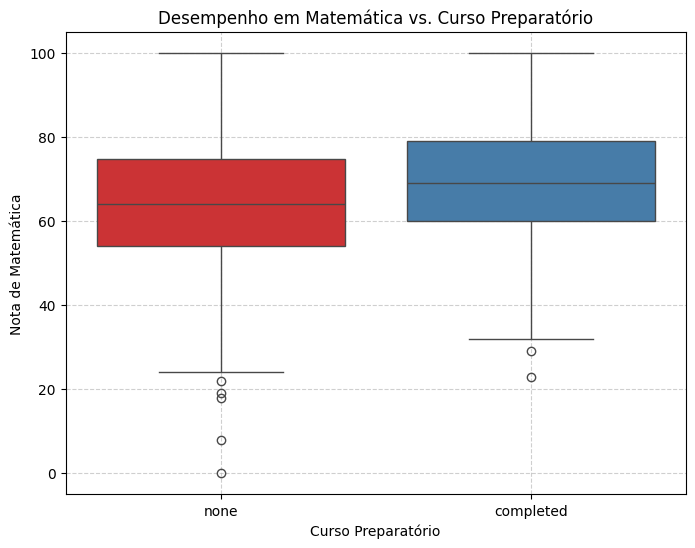

In [19]:
# Investigando a correlação entre: curso preparatório vs desempenho em Matemática

plt.figure(figsize=(8, 6))

sns.boxplot(data=df,
            x='test preparation course',
            y='math score', palette='Set1')

plt.title('Desempenho em Matemática vs. Curso Preparatório')
plt.xlabel('Curso Preparatório')
plt.ylabel('Nota de Matemática')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

/tmp/ipython-input-3864792235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


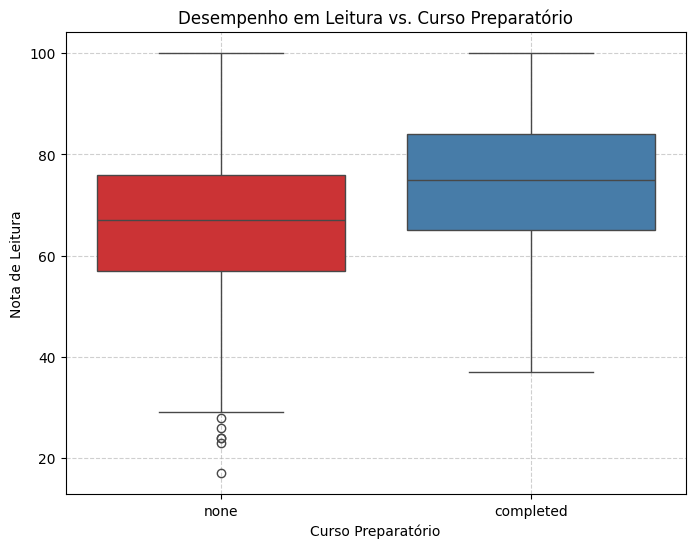

In [20]:
# Investigando a correlação entre: curso preparatório vs desempenho em Leitura

plt.figure(figsize=(8, 6))

sns.boxplot(data=df,
            x='test preparation course',
            y='reading score', palette='Set1')

plt.title('Desempenho em Leitura vs. Curso Preparatório')
plt.xlabel('Curso Preparatório')
plt.ylabel('Nota de Leitura')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

/tmp/ipython-input-3961649274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


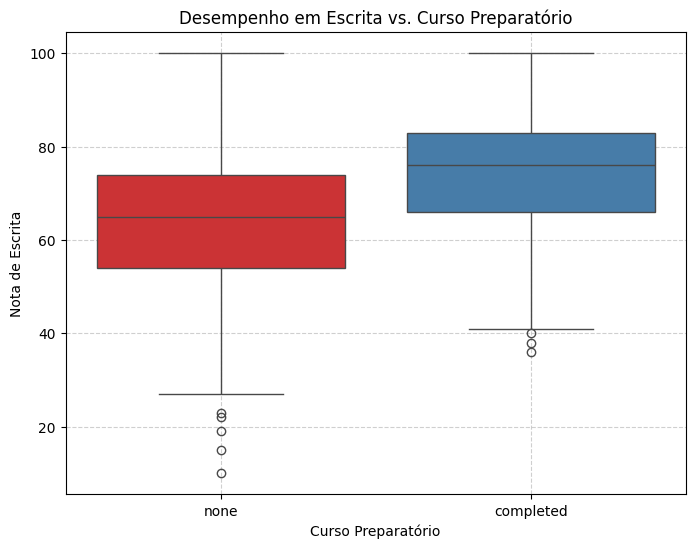

In [21]:
# Investigando a correlação entre: curso preparatório vs desempenho em Escrita

plt.figure(figsize=(8, 6))

sns.boxplot(data=df,
            x='test preparation course',
            y='writing score', palette='Set1')

plt.title('Desempenho em Escrita vs. Curso Preparatório')
plt.xlabel('Curso Preparatório')
plt.ylabel('Nota de Escrita')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

**O curso preparatório parece ter impacto positivo nas notas? <br>
->** Sim, o curso preparatório altera as notas significamente. Pode-se afirmar isso devido a que no boxplot a distribuição das notas é superior.

**Quais outros fatores medidos estão associados a boas notas? E a notas ruins?

**NOTAS BOAS:**
*   Gender(sutil, "female" tendeu a ter notas ligeiramente maiores em leitura e redação, enquanto "male" teve um desempenho um pouco superior em matemática.)
*   "Lunch" do tipo "standard"(atingiu melhores notas, mostrando que um almoço melhor, influencia na nota do aluno, mesmo que sutilmente)
*   "Test Preparation Course" do tipo "completed"(atingiu notas significamente melhores em "math", "learning" e "writing")
*   "Parental Level Of Education" do tipo "bachelor's degree" e "master degree" tiveram notas melhores do que "High School" por exemplo. Em geral, niveis mais altos resultaram em melhores notas.

**NOTAS RUINS:**
*   "Lunch" do tipo "free/reduced"(atingiu notas mais baixas, mostrando que um almoço de qualdiade inferior, influencia na nota do aluno, mesmo que sutilmente)
*   "Test Preparation Course" do tipo "none" atingiu notas piores em "math", "learning" e "writing" do que o "completed"
*   "Parental Level Of Education" do tipo "High School" e "Some high School" obtiveram notas piores que os graus mais altos. Em geral, niveis mais baixos resultaram em notas mais baixas.

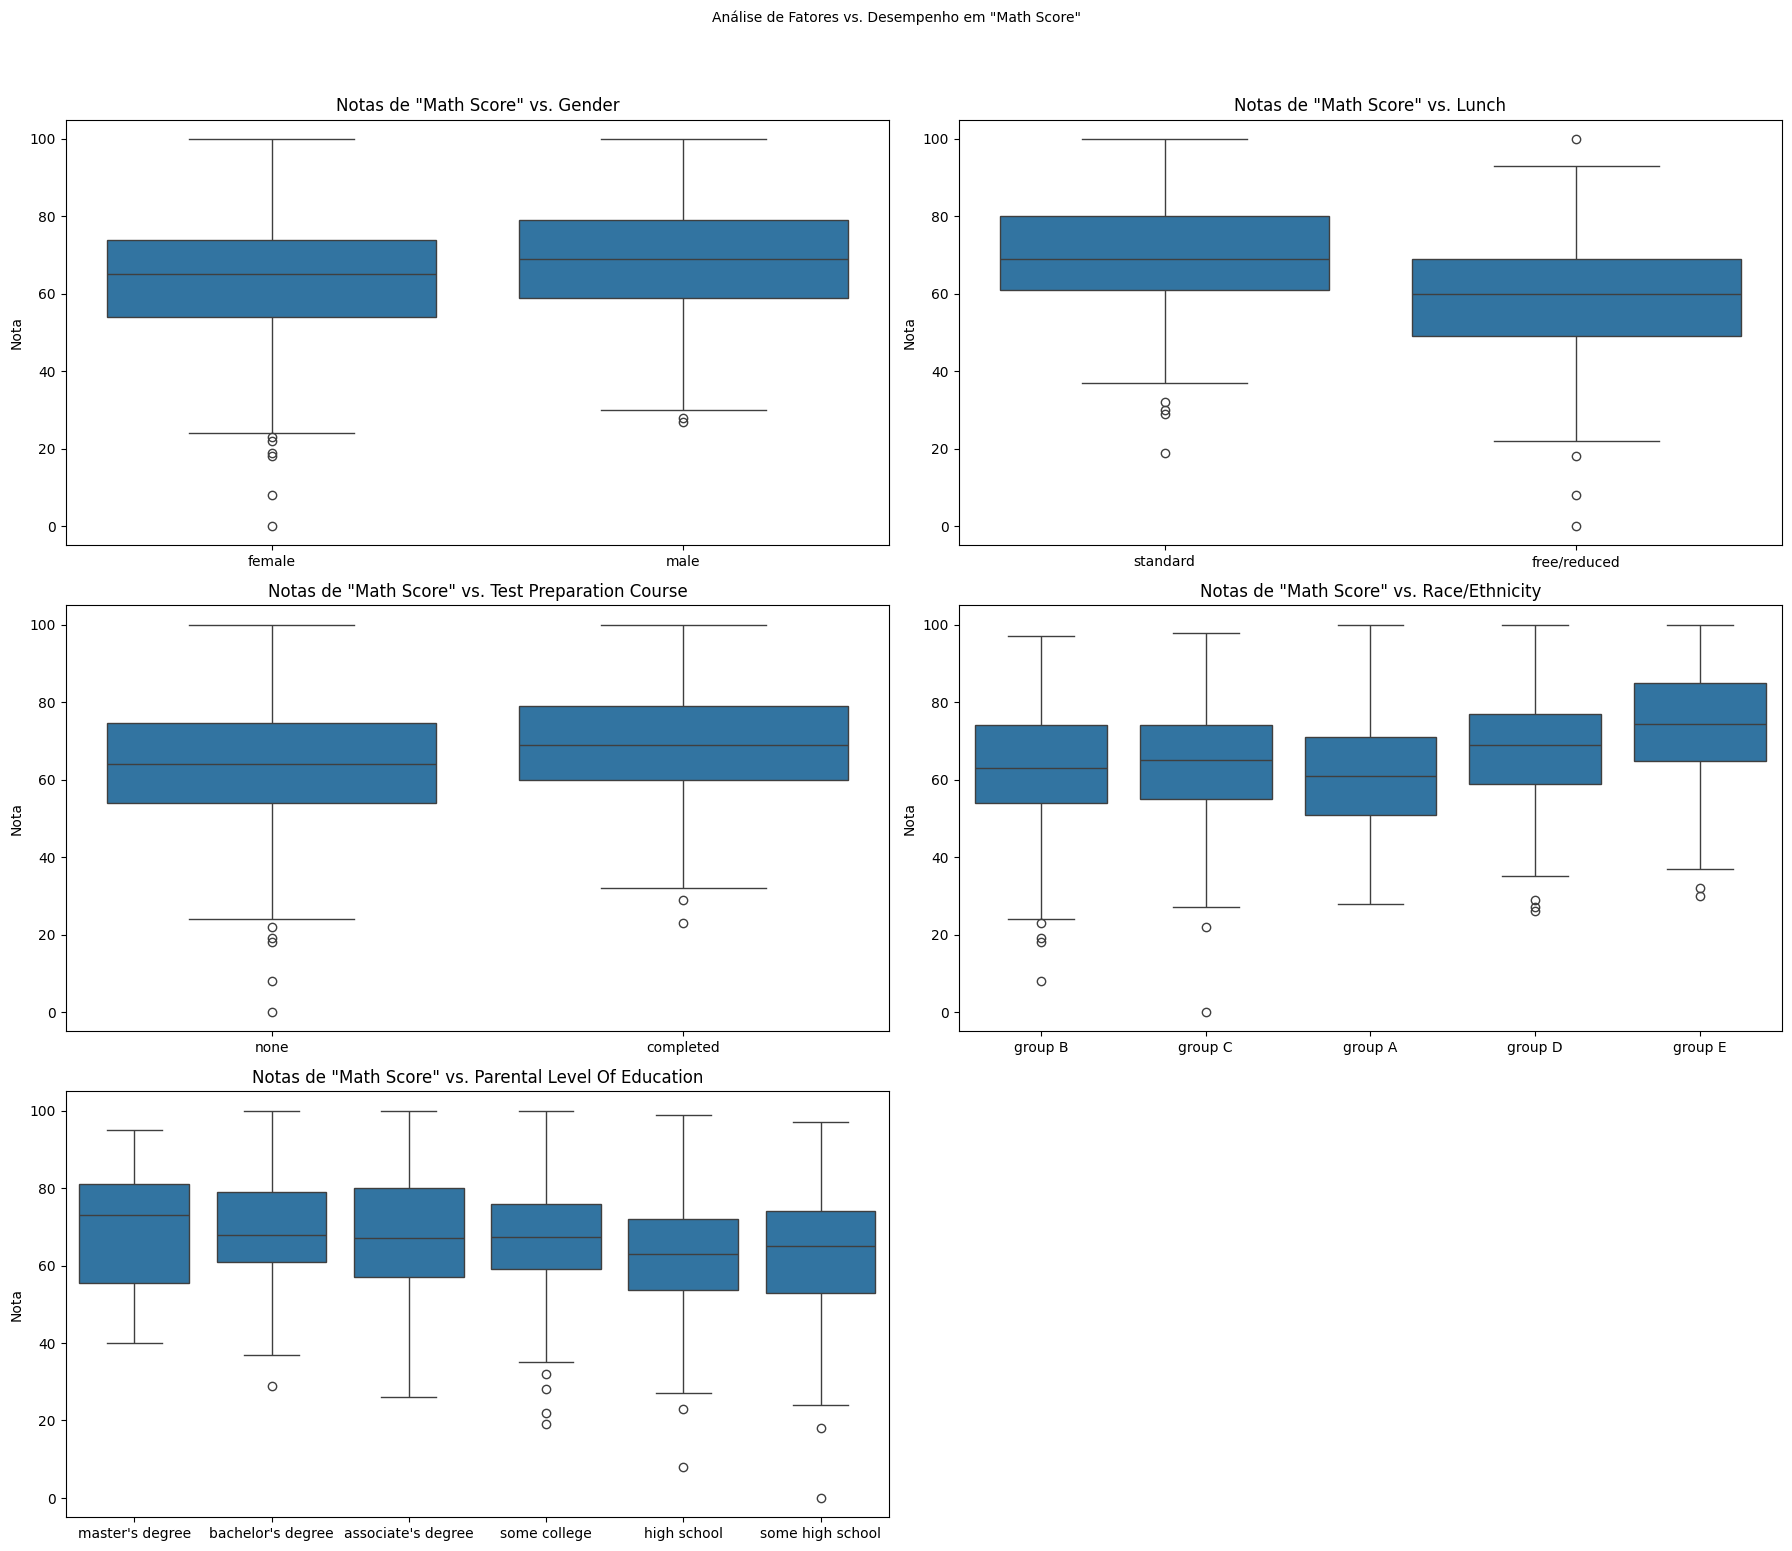

In [22]:
# Analisando os fatores com as notas de matemática
nota_analisada = 'math score'

fatores_categoricos = [
    'gender',
    'lunch',
    'test preparation course',
    'race/ethnicity',
    'parental level of education'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

fig.suptitle(f'Análise de Fatores vs. Desempenho em "{nota_analisada.title()}"', fontsize=10, y=1.03)

for i, fator in enumerate(fatores_categoricos):
    ax = axes[i]

    if fator == 'parental level of education':
        ordem = sorted(df[fator].unique(), key=lambda x: ('some high' in x, 'high school' in x, 'some college' in x, 'associate' in x, 'bachelor' in x, 'master' in x))
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax, order=ordem)
    else:
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax)

    ax.set_title(f'Notas de "{nota_analisada.title()}" vs. {fator.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Nota')

axes[-1].set_visible(False)

plt.tight_layout(pad=1.0)

plt.show()

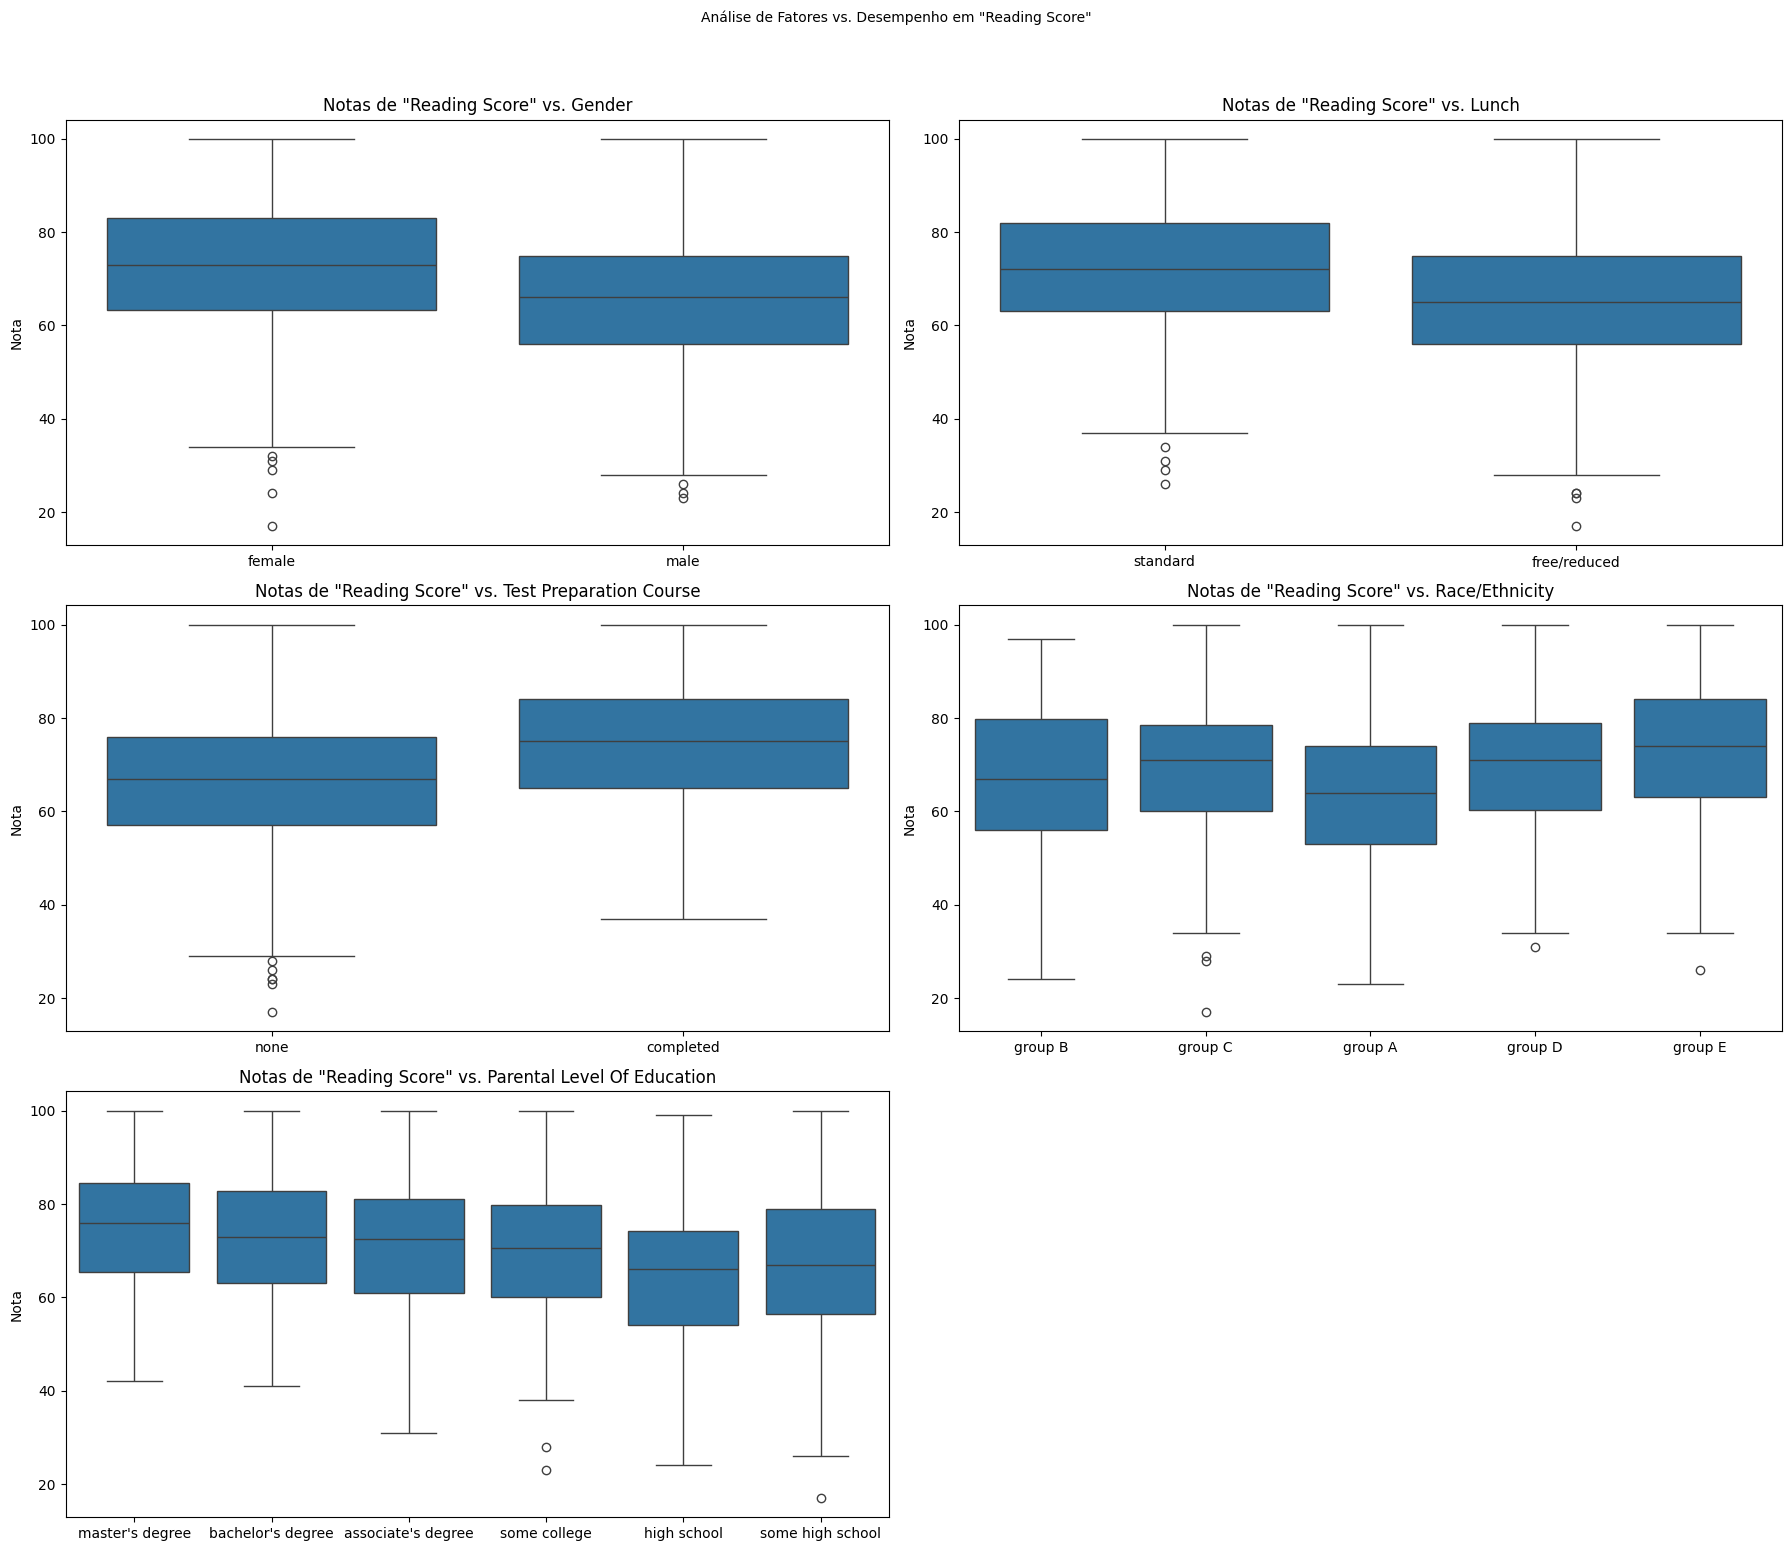

In [23]:
# Analisando os fatores com as notas de Leitura
nota_analisada = 'reading score'

fatores_categoricos = [
    'gender',
    'lunch',
    'test preparation course',
    'race/ethnicity',
    'parental level of education'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

fig.suptitle(f'Análise de Fatores vs. Desempenho em "{nota_analisada.title()}"', fontsize=10, y=1.03)

for i, fator in enumerate(fatores_categoricos):
    ax = axes[i]

    if fator == 'parental level of education':
        ordem = sorted(df[fator].unique(), key=lambda x: ('some high' in x, 'high school' in x, 'some college' in x, 'associate' in x, 'bachelor' in x, 'master' in x))
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax, order=ordem)
    else:
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax)

    ax.set_title(f'Notas de "{nota_analisada.title()}" vs. {fator.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Nota')

axes[-1].set_visible(False)

plt.tight_layout(pad=1.0)

plt.show()

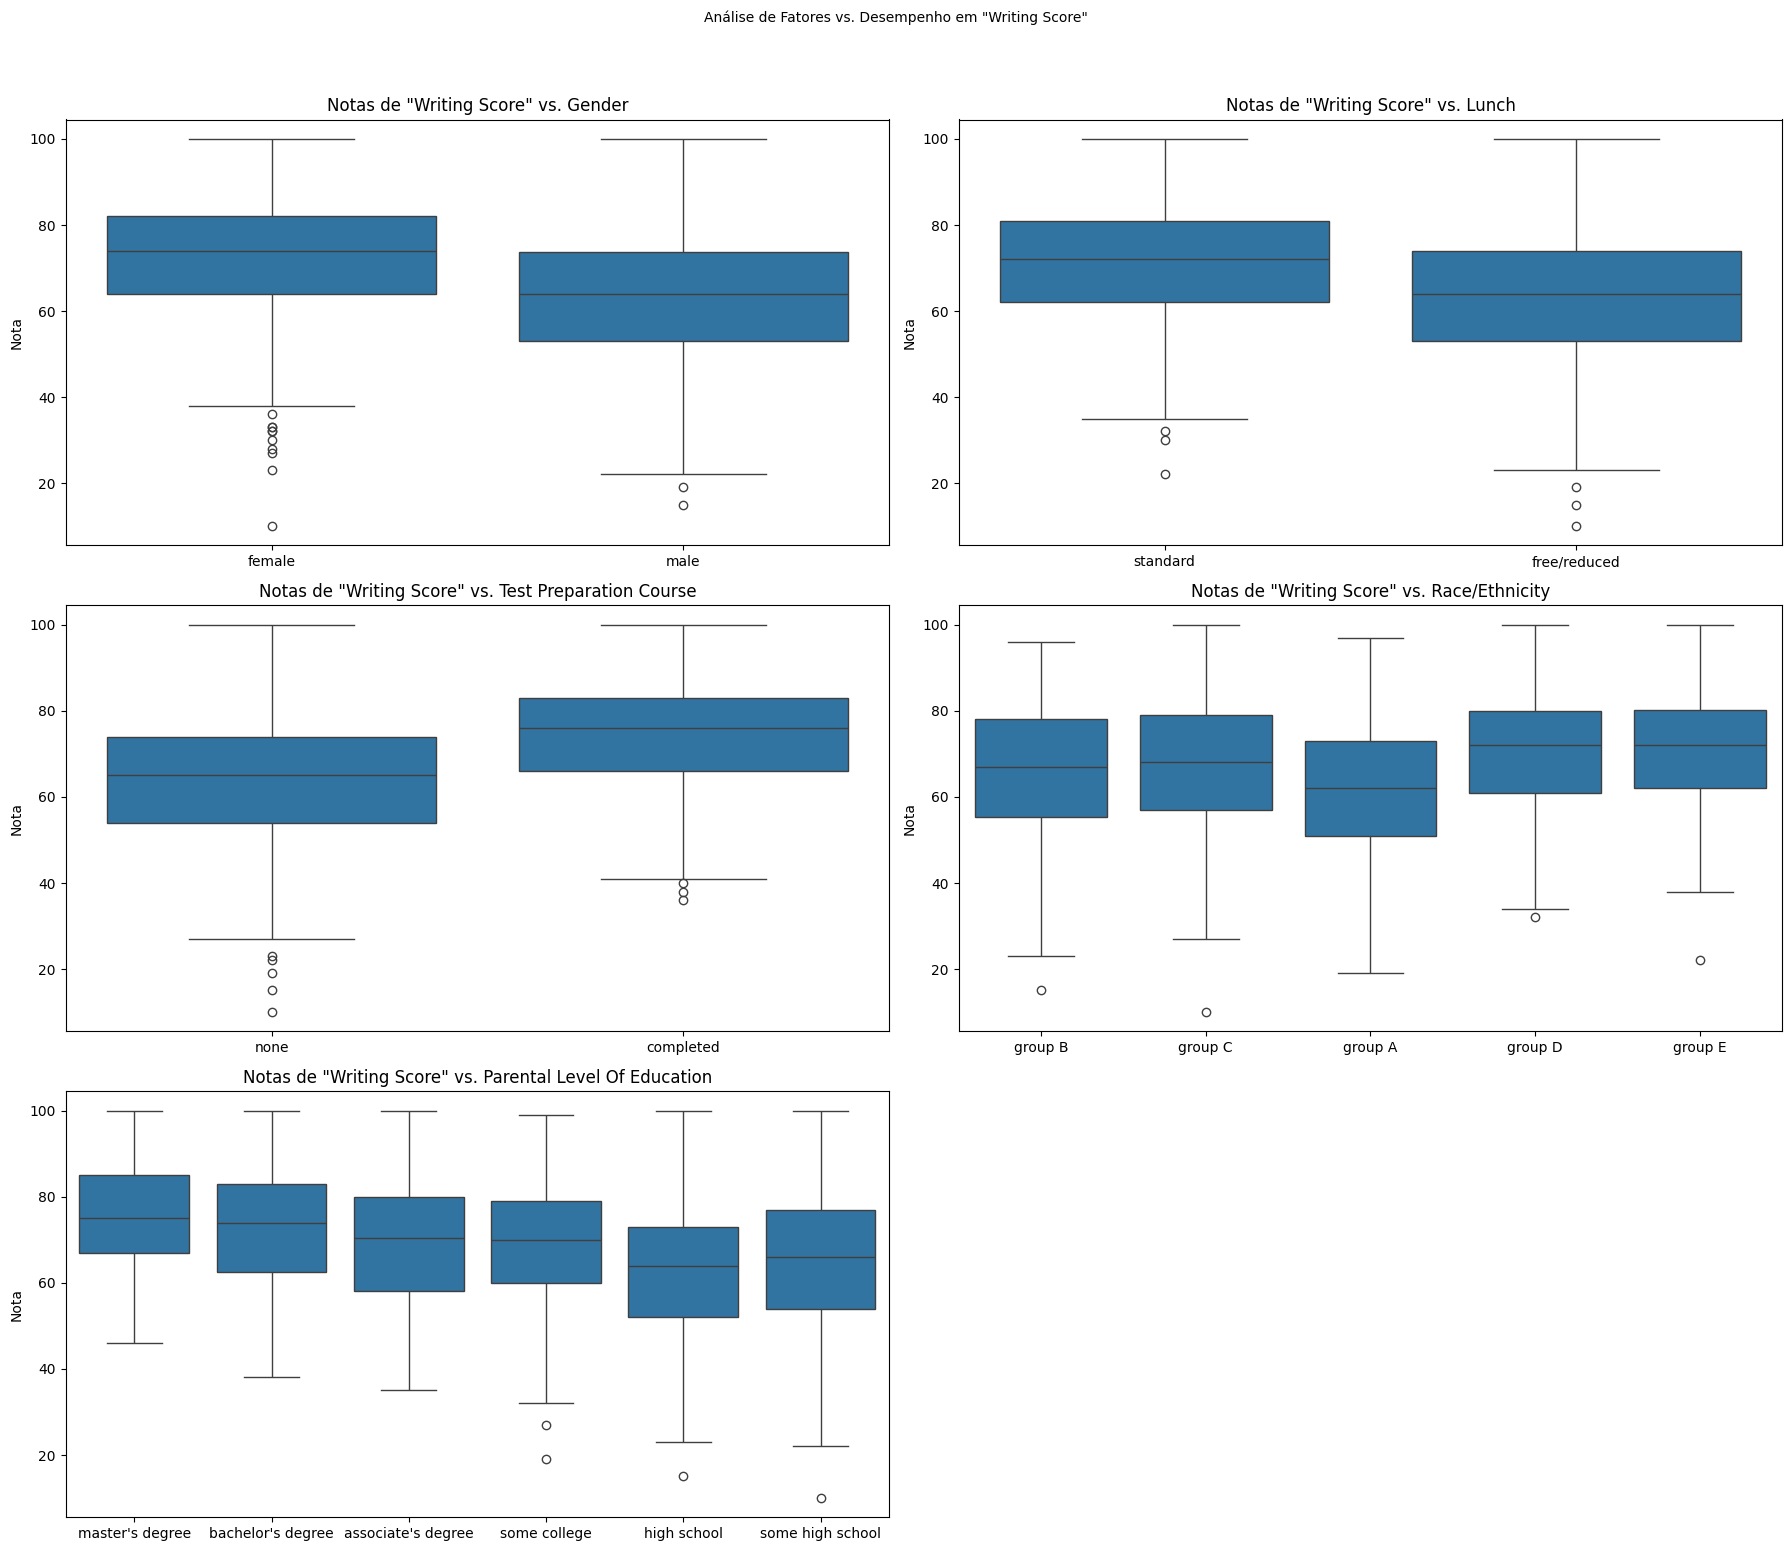

In [24]:
# Analisando os fatores com as notas de Escrita
nota_analisada = 'writing score'

fatores_categoricos = [
    'gender',
    'lunch',
    'test preparation course',
    'race/ethnicity',
    'parental level of education'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

fig.suptitle(f'Análise de Fatores vs. Desempenho em "{nota_analisada.title()}"', fontsize=10, y=1.03)

for i, fator in enumerate(fatores_categoricos):
    ax = axes[i]

    if fator == 'parental level of education':
        ordem = sorted(df[fator].unique(), key=lambda x: ('some high' in x, 'high school' in x, 'some college' in x, 'associate' in x, 'bachelor' in x, 'master' in x))
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax, order=ordem)
    else:
        sns.boxplot(data=df, x=fator, y=nota_analisada, ax=ax)

    ax.set_title(f'Notas de "{nota_analisada.title()}" vs. {fator.replace("_", " ").title()}', fontsize=12)
    ax.set_xlabel('', fontsize=10)
    ax.set_ylabel('Nota')

axes[-1].set_visible(False)

plt.tight_layout(pad=1.0)

plt.show()